In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [23]:
# Loading the data
data = pd.read_csv('/Users/britneyjaculina/Desktop/Trihourly_Weather_Dataset.csv')

In [24]:
# Transform 'forest_fire' into binary
# Y = 1 = forest_fire occured, N = 0 = forest_fire did not occur
data['forest_fire'] = data['forest_fire'].map({'Y': 1, 'N': 0})

In [25]:
# Populating the 'Severity' NaN values with 0
data['Severity'] = data['Severity'].fillna(0)

In [26]:
# Converting 'date' column to year, month, and day columns
# Dropping the original 'date' column
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%y')
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data.drop('date', axis=1, inplace=True)

In [27]:
# Converting 'time' column in hour, minute, second
# Dropping the original 'time' column
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.time
data['hour'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.hour
data['minute'] = pd.to_datetime(data['time'], format='%H:%M:%S').dt.minute
data.drop('time', axis=1, inplace=True)

In [28]:
# Dropping 'datetime' column to accommodate above steps
data.drop('datetime', axis=1, inplace=True)

In [29]:
# Filling in missing values
data.fillna(data.select_dtypes(include=['number']).mean(), inplace=True)

In [30]:
# Count the number of negative samples (forest_fire = 0)
num_negative_samples = (data['forest_fire'] == 0).sum()

print("Number of negative samples (forest_fire = 0):", num_negative_samples)

Number of negative samples (forest_fire = 0): 11688


In [31]:
# Count the number of positive samples (forest_fire = 1)
num_positive_samples = (data['forest_fire'] == 1).sum()

print("Number of positive samples (forest_fire = 1):", num_positive_samples)

Number of positive samples (forest_fire = 1): 6421


In [32]:
# Set up features and target
X = data.drop(['forest_fire','Severity'], axis=1)
y = data['Severity']

In [33]:
# X = features
X.head()

,temperature_2m,relative_humidity_2m,precipitation,surface_pressure,cloud_cover,wind_speed_10m,soil_temperature_0_to_7cm,soil_temperature_7_to_28cm,soil_moisture_0_to_7cm,soil_moisture_7_to_28cm,year,month,day,hour,minute
0,6.061000,67.824059,0.0,933.246216,20.400002,6.638072,6.061,8.061001,0.364,0.372,2020.0,1.0,1.0,7.0,0.0
1,3.861000,77.639603,0.0,931.856018,26.700001,4.693825,5.311,7.761000,0.364,0.372,2020.0,1.0,1.0,9.0,0.0
2,4.361000,75.236038,0.0,931.915161,14.400001,4.610250,3.911,6.961000,0.359,0.370,2020.0,1.0,1.0,12.0,0.0
3,6.111000,73.412125,0.0,932.712647,20.700001,8.788720,4.611,6.511000,0.359,0.369,2020.0,1.0,1.0,15.0,0.0
4,12.561001,61.951244,0.0,934.771851,0.000000,6.489992,7.461,6.511000,0.358,0.369,2020.0,1.0,1.0,18.0,0.0


In [34]:
# y = target = 'Severity' column
# Counting different 'Severity' values
y.value_counts()

Severity
0.000000     11688
27.500000      156
25.000000       90
36.935283        6
36.614845        5
             ...  
31.585665        1
31.582743        1
31.579553        1
31.573254        1
42.643980        1
Name: count, Length: 5476, dtype: int64

In [35]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the XGBoost regressor model
regressor_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the regressor model on training dataset
regressor_model.fit(X_train, y_train)

# Making predictions on testing dataset
y_pred = regressor_model.predict(X_test)

# Evaluating and printing the model's performance
# Model's performance is the error between predicted and actual values
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.632527555483956


In [36]:
# Creating a function that intakes severity values
# 0's indicate no wildfire occurence
def classify_severity(severity):
    if severity == 0:
        return 0
    else:
        return 1

# Create a new column called 'classified' and apply the 'Severity' column
data['classified'] = data['Severity'].apply(classify_severity)

# Output 'classified'
print(data['classified'])

0        0
1        0
2        0
3        0
4        0
        ..
18105    1
18106    1
18107    1
18108    1
18109    1
Name: classified, Length: 18110, dtype: int64


In [37]:
# Count the number of positive samples after regression model (classified = 1)
num_classified = (data['classified'] == 1).sum()

print("Number of positive samples (classified = 1):", num_classified)

Number of positive samples (classified = 1): 6422


In [38]:
# Count the number of positive samples before regression model (forest_fire = 1)
num_positive_samples = (data['forest_fire'] == 1).sum()

print("Number of positive samples (forest_fire = 1):", num_positive_samples)

Number of positive samples (forest_fire = 1): 6421


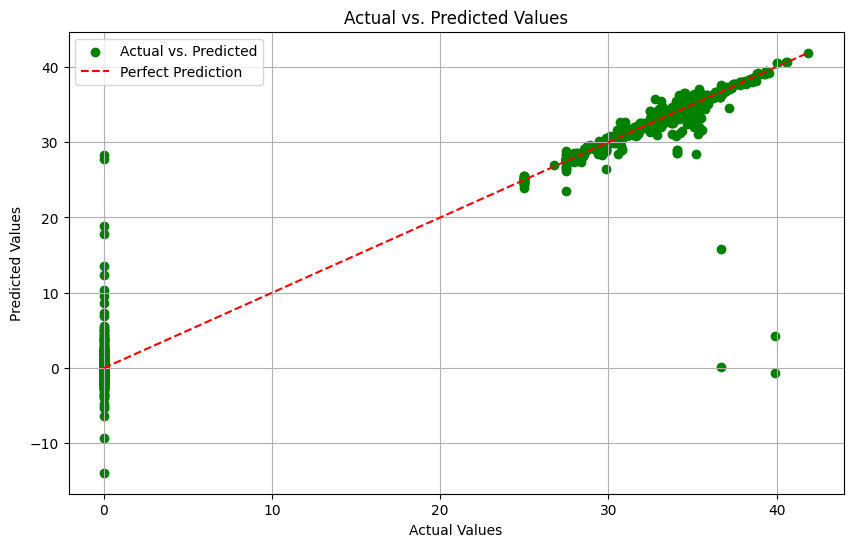

In [39]:
import matplotlib.pyplot as plt

# Plotting actual and predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', label='Actual vs. Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
